In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
#Transform the data into a Dataframe
df= pd.read_csv('all_data.csv')
print(df)

     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]


In [4]:
#Rename the columns to have a easier acess to them
df= df.rename({'Country':'country','Year':'year','Life expectancy at birth (years)':'life_expectancy','GDP':'gdp'} ,axis = 'columns')

In [5]:
print(df)

     country  year  life_expectancy           gdp
0      Chile  2000             77.3  7.786093e+10
1      Chile  2001             77.3  7.097992e+10
2      Chile  2002             77.8  6.973681e+10
3      Chile  2003             77.9  7.564346e+10
4      Chile  2004             78.0  9.921039e+10
..       ...   ...              ...           ...
91  Zimbabwe  2011             54.9  1.209845e+10
92  Zimbabwe  2012             56.6  1.424249e+10
93  Zimbabwe  2013             58.0  1.545177e+10
94  Zimbabwe  2014             59.2  1.589105e+10
95  Zimbabwe  2015             60.7  1.630467e+10

[96 rows x 4 columns]


In [6]:
#Analyse the variables
print(df.country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [7]:
print(df.year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Text(0.5, 1.0, 'Total of GDP')

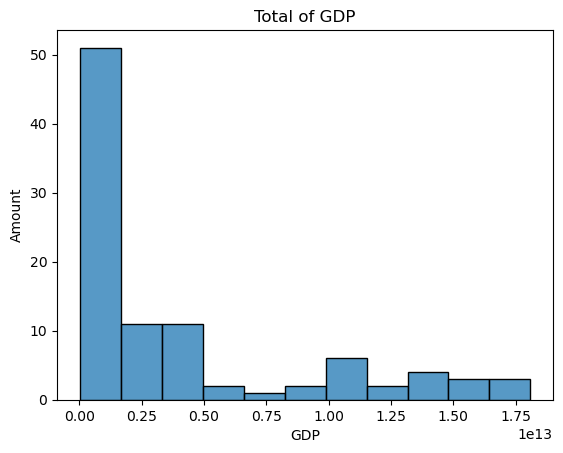

In [17]:
#the plot about destribuiton of GDP
sns.histplot(df,x=df.gdp)
plt.xlabel('GDP')
plt.ylabel('Count')
plt.title('Total of GDP')

In [13]:
#Some statistical analyze about the GDP
gdp_mean = np.mean(df.gdp)
print('The average GDP for all the countries is ' + str(round(gdp_mean)))

The average GDP for all the countries is 3880498570768


In [21]:
gdp_min = np.min(df.gdp)
gdp_max = np.max(df.gdp)
print('The values of the GDP go from ' + str(gdp_min) + ' until '+str(gdp_max) + '.')

The values of the GDP go from 4415702800.0 until 18100000000000.0.


Text(0.5, 1.0, 'Total of Life Expectancy')

<Figure size 900x500 with 0 Axes>

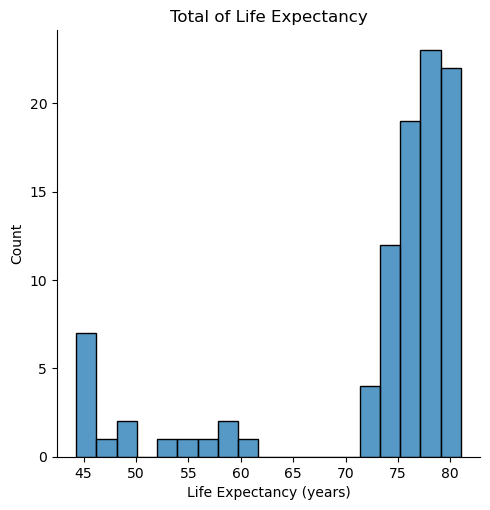

In [23]:
#A plot about the destribuition of the Total of Life Expecntacy
plt.figure(figsize=(9,5))
sns.displot(df.life_expectancy)
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Count')
plt.title('Total of Life Expectancy')

In [15]:
#The means of the life expectancuy of each country and then of all the countries together
chile_life_expectancy = np.mean(df.life_expectancy[df.country == 'Chile'])
germany_life_expectancy =np.mean(df.life_expectancy[df.country=='Germany'])
zimbabwe_life_expectancy =np.mean(df.life_expectancy[df.country=='Zimbabwe'])
china_life_expectancy =np.mean(df.life_expectancy[df.country=='China'])
mexico_life_expectancy =np.mean(df.life_expectancy[df.country=='Mexico'])
eua_life_expectancy =np.mean(df.life_expectancy[df.country=='United States of America'])

mean_life_expectancy = np.mean(df.life_expectancy)
print('The average life expectancy of this countries is ' + str(round(mean_life_expectancy,2)) + ' years.')

The average life expectancy of this countries is 72.79 years.


Text(0.5, 1.0, 'Life Expectancy of each Country')

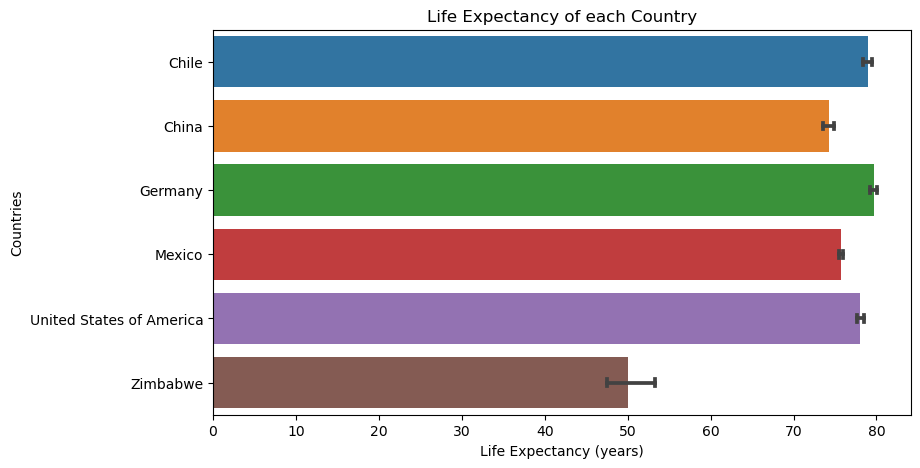

In [16]:
#A plot about the Life Expectancy of each country with error bars
plt.figure(figsize=(9,5))
sns.barplot(y=df.country,x=df.life_expectancy,data=df,capsize=0.1)
plt.ylabel('Countries')
plt.xlabel('Life Expectancy (years)')
plt.title('Life Expectancy of each Country')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chile'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'United States of America'),
  Text(5, 0, 'Zimbabwe')])

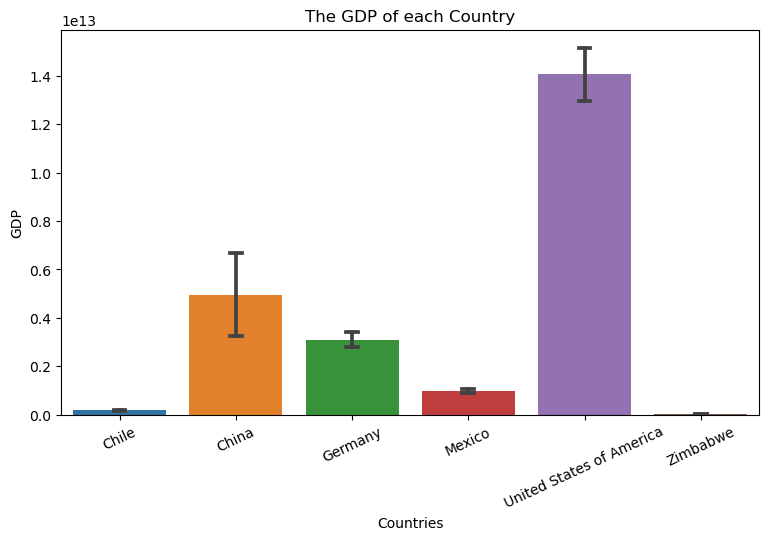

In [25]:
#Now is the plot about the GDP of each Country with error bars
plt.figure(figsize=(9,5))
sns.barplot(x=df.country,y=df.gdp,data=df,capsize=0.1)
plt.title('The GDP of each Country')
plt.xlabel('Countries')
plt.ylabel('GDP')
plt.xticks(rotation=25)

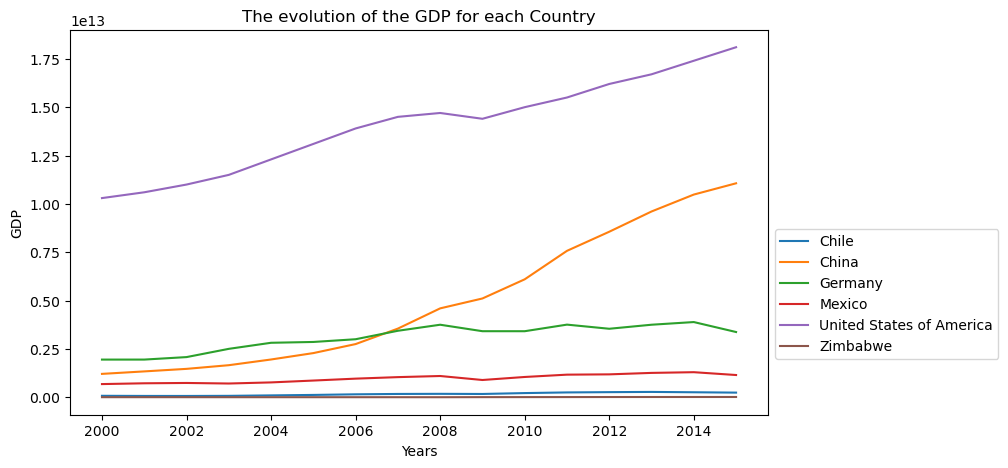

In [27]:
#This plot shows the evolution of the GDP for each country, represented by different collors
plt.figure(figsize=(9,5))
sns.lineplot(x=df.year,y=df.gdp,hue=df.country)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('The evolution of the GDP for each Country')
plt.legend(bbox_to_anchor=(1,0.5),ncol=1)

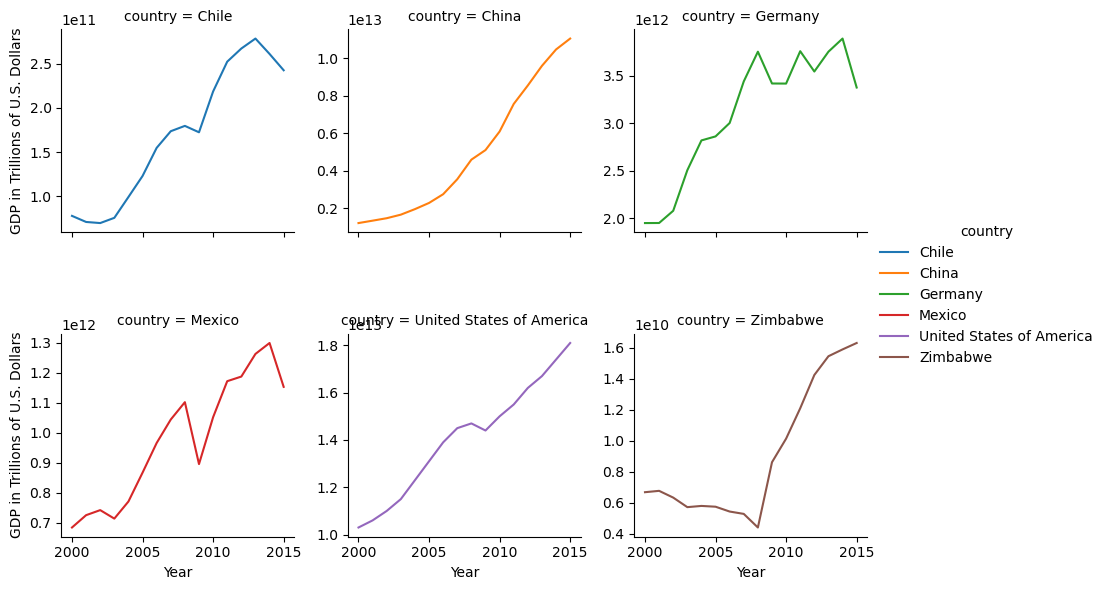

In [28]:
#Now through the FacetGrid and the .map we will make a plot for each country representing their GDP evolution over the years
graphGDP = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"year","gdp")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;
plt.subplots_adjust(hspace=0.5)

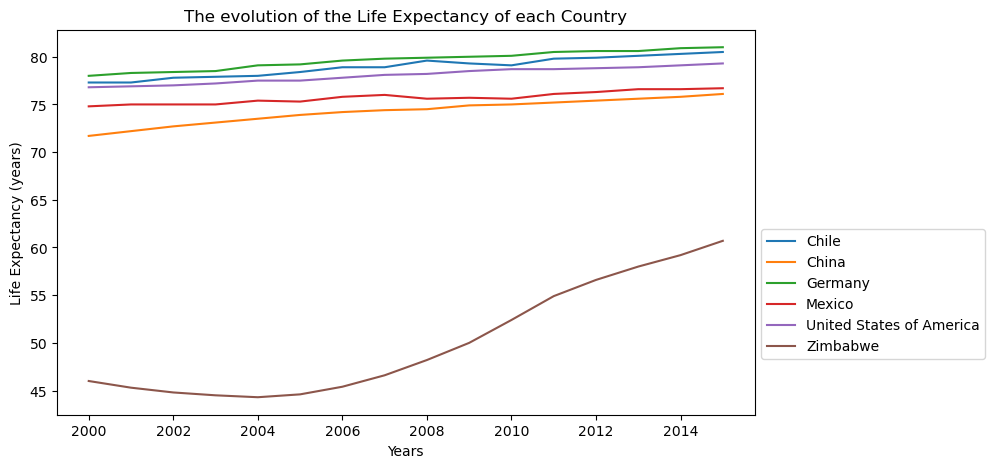

In [29]:
##This plot shows the evolution of the Life Expectancy for each country, represented by different collors
plt.figure(figsize=(9,5))
sns.lineplot(x=df.year,y=df.life_expectancy,hue=df.country)
plt.xlabel('Years')
plt.ylabel('Life Expectancy (years)')
plt.title('The evolution of the Life Expectancy of each Country')
plt.legend(bbox_to_anchor=(1,0.5),ncol=1)

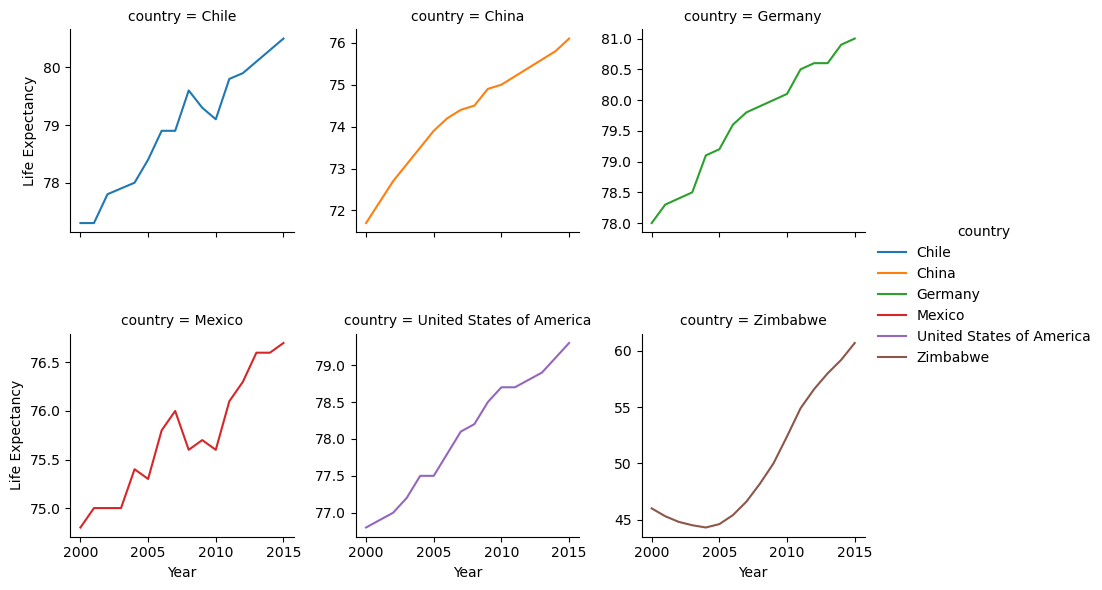

In [30]:
##Now through the FacetGrid and the .map we will make a plot for each country representing their Life Expectancy evolution over the years
graphGDP = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"year","life_expectancy")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy"))

graphGDP;
plt.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, 'The destribution of the Life Expectancy related to the GDP')

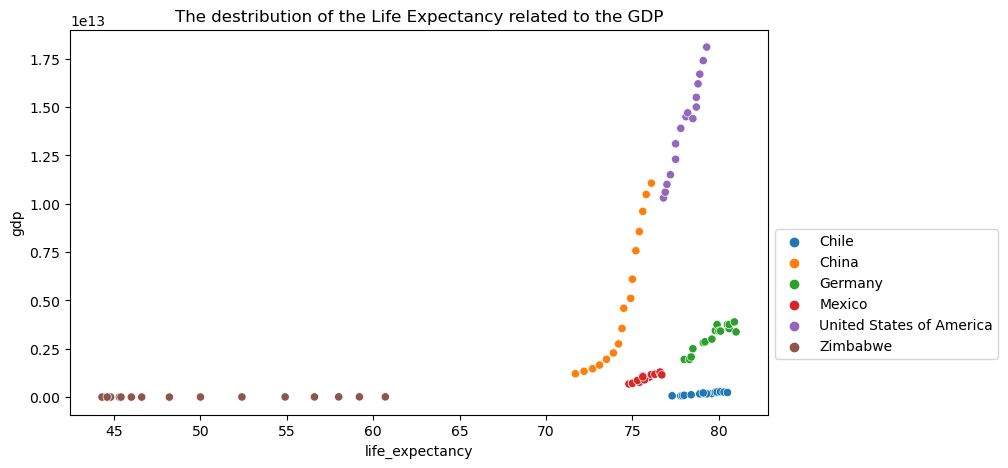

In [31]:
#Now to see the relation about the GDP and the Life Expectancy of each country we create a scatter plot
plt.figure(figsize=(9,5))
sns.scatterplot(y=df.gdp,x=df.life_expectancy,hue=df.country)
plt.legend(bbox_to_anchor=(1,0.5),ncol=1)
plt.title('The destribution of the Life Expectancy related to the GDP')

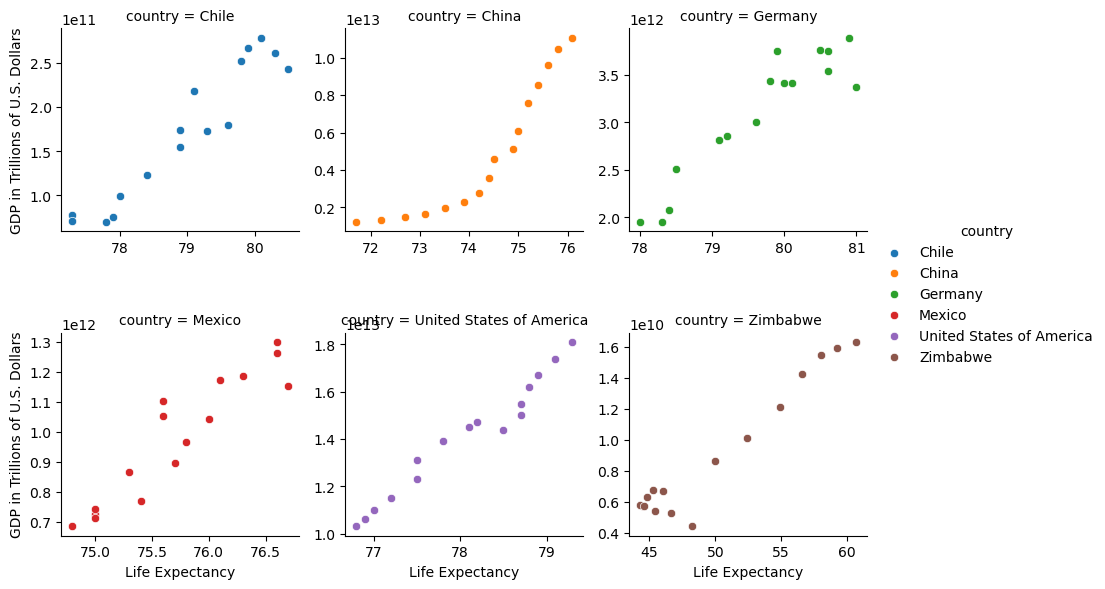

In [32]:
##Now through the FacetGrid and the .map we will make a scatterplot for each country to see the relationship of the GDP and the Life Expectancy 
graphGDP = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False, sharex=False)

graphGDP = (graphGDP.map(sns.scatterplot,"life_expectancy","gdp")
         .add_legend()
         .set_axis_labels("Life Expectancy","GDP in Trillions of U.S. Dollars"))

graphGDP;
plt.subplots_adjust(hspace=0.5)